# Exercise Set 1
## Title
### Scientific Computing
Nitai Nijholt (12709018)

Pablo Rodriguez Alves (15310191)

In [1]:
from math import erfc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 1. Vibrating string

### A. Discretize the wave equation
And write it in a form suitable for implementing in a computer program

In [94]:
def runge_kutta(func, y0, h, timesteps):
    """Runge Kutta 4th order implementation"""
    time_array = np.arange(0, timesteps*h, step=h)
    y = np.zeros(len(time_array))
    y[0] = y0
    for i in range(1, len(time_array)):
        k1 = func(y[i-1])
        k2 = func(y[i-1] + 0.5*h*k1)
        k3 = func(y[i-1] + 0.5*h*k2)
        k4 = func(y[i-1] + h*k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return time_array, y

In [95]:
def create_2d_meshgrid(L = 1.0, T = 1.0, Nx = 100,  Nt = 100):
    """Creating 2d meshgrid for numerically solving wave PDE'"""

    # Calculating the stepsize, exclusing 1 point
    delta_x = L / (Nx - 1)
    delta_t = T / (Nt - 1)

    # Creating space and time arrays
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)

    # Combining space and time arrays into a 2d meshgrid
    X, T = np.meshgrid(x, t, indexing='ij')
    return X, T, delta_x, delta_t

In [4]:
def initial_condition(u):
    
    return np.sin(np.pi * x)

In [5]:
def u_space(u, x_index, t_index, c, dx):
    """
    Compute the spatial update component for the wave equation.
    
    Parameters:
    - u: 2D array of u values
    - x_index: Index corresponding to the spatial position
    - t_index: Index corresponding to the time step
    - c: Wave speed
    - dx: Spatial step size
    
    Returns:
    - The spatial update component for u at the given index.
    """
    return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)

In [6]:
def update_wave(u, c, dx, dt, Nx, Nt):
    """
    Update the wave function u for all spatial points and for the next time step, using u_space for spatial updates.
    
    Parameters:
    - u: 2D array of u values, shape (Nx, Nt)
    - c: Wave speed
    - dx: Spatial step size
    - dt: Temporal step size
    - Nx: Number of spatial points
    - Nt: Number of time points
    """
    for t_index in range(0, Nt-1):  # Iterate through time steps
        for x_index in range(1, Nx-1):  # Iterate through spatial points, excluding boundaries
            # Calculate the spatial term using u_space
            spatial_term = u_space(u, x_index, t_index, c, dx)
            
            # Apply the update rule, incorporating the spatial term correctly
            if t_index == 0:
                # Handle the first time step with a specific aproach yet to be determined..
                pass
            else:
                # General update rule for subsequent time steps
                u[x_index, t_index+1] = 2*u[x_index, t_index] - u[x_index, t_index-1] + spatial_term * dt**2
    return u

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\1161476035.py:15: RuntimeWarning: overflow encountered in multiply
  return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\4060189576.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u[x_index, t_index+1] = 2*u[x_index, t_index] - u[x_index, t_index-1] + spatial_term * dt**2
C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\1161476035.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)
c:\Python310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1

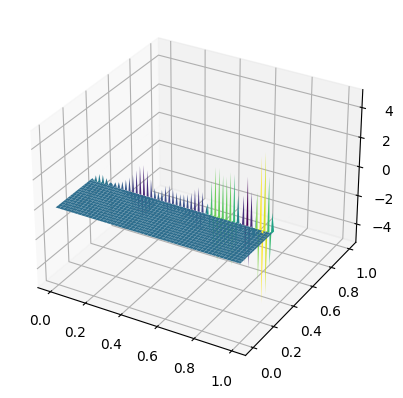

In [35]:
# Simulating


# Step 1: Create the meshgrid for initialization & set c
L, T, Nx, Nt = 1.0, 1.0, 100, 100
X, T_mesh, dx, dt = create_2d_meshgrid(L, T, Nx, Nt)
c = 100000


# Step 2: Initialize u based on X (and possibly T_mesh for non-uniform initial conditions)
u = np.zeros((Nx, Nt))
u[:, 0] = np.sin(np.pi * X[:, 0]) 


# Step 3: Update wave
update_wave(u, c, dx, dt, Nx, Nt)

# Step 4: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, T_plot = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, T, Nt))
ax.plot_surface(X, T_plot, u.T, cmap='viridis')  # Note: u.T for correct orientation
plt.show()

### B. Implement time stepping
And determine the time development of the string
And plot the results at several times in the same figure

### C. Make an animated plot of the time development

## 2. The Time Dependent Diffusion Equation

### D. Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A figure is extremely helpful for figuring this out.

In [22]:
def is_solution_stable(D,dt,dx):
    print((4*dt*D)/(dx**2))
    return (4*dt*D)/(dx**2) <= 1

def is_point_in_bounds(c,i,j):
    imax,jmax = c.shape
    return bool(i >= 0 and i < imax and j >= 0 and j < jmax)

def get_neighboors(c,i,j,N):
    # Get neighboors if possible
    # Later on additional conditions will be added here for sinks and so on...

    # TODO: Connect values in columns!!!

    if j==0:
        # Left column
        # value for j-1 is now the last column (j==N-1)!
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,N-1]
    elif j==(N-1):
        # Right column
        # Value for j+1 is now the first column (j=0)
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,0]
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0
    else:
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0

    return c1,c2,c3,c4

def start_grid(N):
    c = np.zeros((N,N))
    
    # Left column
    c[:,0] = 0

    # Right column same as left
    #c[:,N-1] = c[:,0]

    # Top row
    c[0,:] = 1

    # Bottom row
    #c[N-1,:] = 0
    return c

def update(c,dx,dt,D,N):
    # Make a copy to avoid overwriting data early!
    c_k = c.copy()
    
    # Go over every point
    for i,j in np.ndindex(c.shape):
        # Boundary cases: top row, right column and bottom row
        if i==0:
            # Top row
            c_k[i,j] = 1 
        elif i==(N-1):
            # Bottom row          
            c_k[i,j] = 0
        else:
            # Other cases
            # Connected columns dealt within get_neighboors
            c1,c2,c3,c4 = get_neighboors(c_k,i,j,N)
            c[i,j] = c_k[i,j] + (dt*D)*(c1+c2+c3+c4-4*c_k[i,j])/(dx**2)
    return c


def plot_opinion_grid_evolution(c_sim, interval=250, name='sim.gif'):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(6, 6), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        #plt.title('Timestep:',t)
        #plt.clim(0,1)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)


    writergif = animation.PillowWriter(fps=30)
    anim.save(name, dpi=300, writer=writergif)





In [23]:
# Define global parameters
XMAX,YMAX = 1,1
N = 25
D = 1
TIME = 1
dt = 0.0001 #0.0005 #  0.001 # 
dx = 1/N

# Ensure our parameters create a stable solution
assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,TIME,int(TIME/dt))




0.25


In [24]:
# Create matrices for the simulation
c_sim = np.zeros((t_vector.size,N,N))

# Run the simulation
for t in range(int(TIME/dt)):
    c = update(c,dx,dt,D,N)
    c_sim[t,:,:] = c

In [4]:
# Save data to file! (WARNING, MAY TAKE LOTS OF SPACE!)
np.save('c_sim.npy',c_sim)

### E. Test the correctness of your simulation.
Compare to the analytic solutions, plot c(y) for different times.

In [25]:
def c_analytical(y,t,D,sum_points):
    # Update all terms at once with formula, using sum_points terms for the sum
    terms = [erfc((1-y+2*i)/(2*np.sqrt(D*t)))-erfc((1+y+2*i)/(2*np.sqrt(D*t))) for i in range(sum_points)]
    
    # Return sum
    return np.sum(terms)

In [16]:
"""
def get_sim_at_times(c_sim,times,dt,TIME):
    """
    TODO: Given the entire simulation
    returns the values of the simulation at certain timesteps given in 'times'
    """
    return [c_sim[0,:,:],c_sim[4,:,:],c_sim[8,:,:]]
"""

IndentationError: unexpected indent (3530782202.py, line 4)

In [26]:
# Select time points of interest
times = [0.001,0.01,0.1,1]


In [27]:
# Compute analytical solution
cs_anals = np.zeros((len(times),N))

# Y axis for the analytical solution
ys = np.linspace(0,1,N)

# Terms to use in the infinite sum of the analytical solution
sum_points = 50 

for i in range(len(times)):
    time = times[i]
    cs_anals[i,:] = [c_analytical(y,time,D,sum_points) for y in ys]

In [17]:
"""
# Compute out approximation solution
cs_sims = np.zeros((len(times),N))


c = start_grid(N)
t_vector = np.linspace(0,TIME,int(TIME/dt))
c_sim = np.zeros((t_vector.size,N,N))

for t in range(int(TIME/dt)):
    c = update(c,dx,dt,D,N)
    c_sim[t,:,:] = c

"""


KeyboardInterrupt: 

In [28]:
# Define a function to get the index of the desired times of the simulation
def get_index(time,dt):
    return int(time/dt)-1

# Save them to the array
cs_sims = np.zeros((len(times),N,N))

# Retrieve the values at the right times
cs_sims[0,:,:] = c_sim[get_index(0.0001,dt),:,:]
cs_sims[1,:,:] = c_sim[get_index(0.001,dt),:,:]
cs_sims[2,:,:] = c_sim[get_index(0.1,dt),:,:]
cs_sims[3,:,:] = c_sim[get_index(1,dt),:,:]

In [29]:
# Debug
c_sim[get_index(0.1,dt),:,int(N/2)]

array([1.        , 0.92871773, 0.85800151, 0.78840358, 0.72044915,
       0.6546241 , 0.59136424, 0.53104631, 0.47398108, 0.42040866,
       0.37049605, 0.32433684, 0.28195291, 0.24329784, 0.20826169,
       0.17667689, 0.14832473, 0.12294221, 0.10022887, 0.07985335,
       0.06145949, 0.04467184, 0.02910051, 0.01434541, 0.        ])

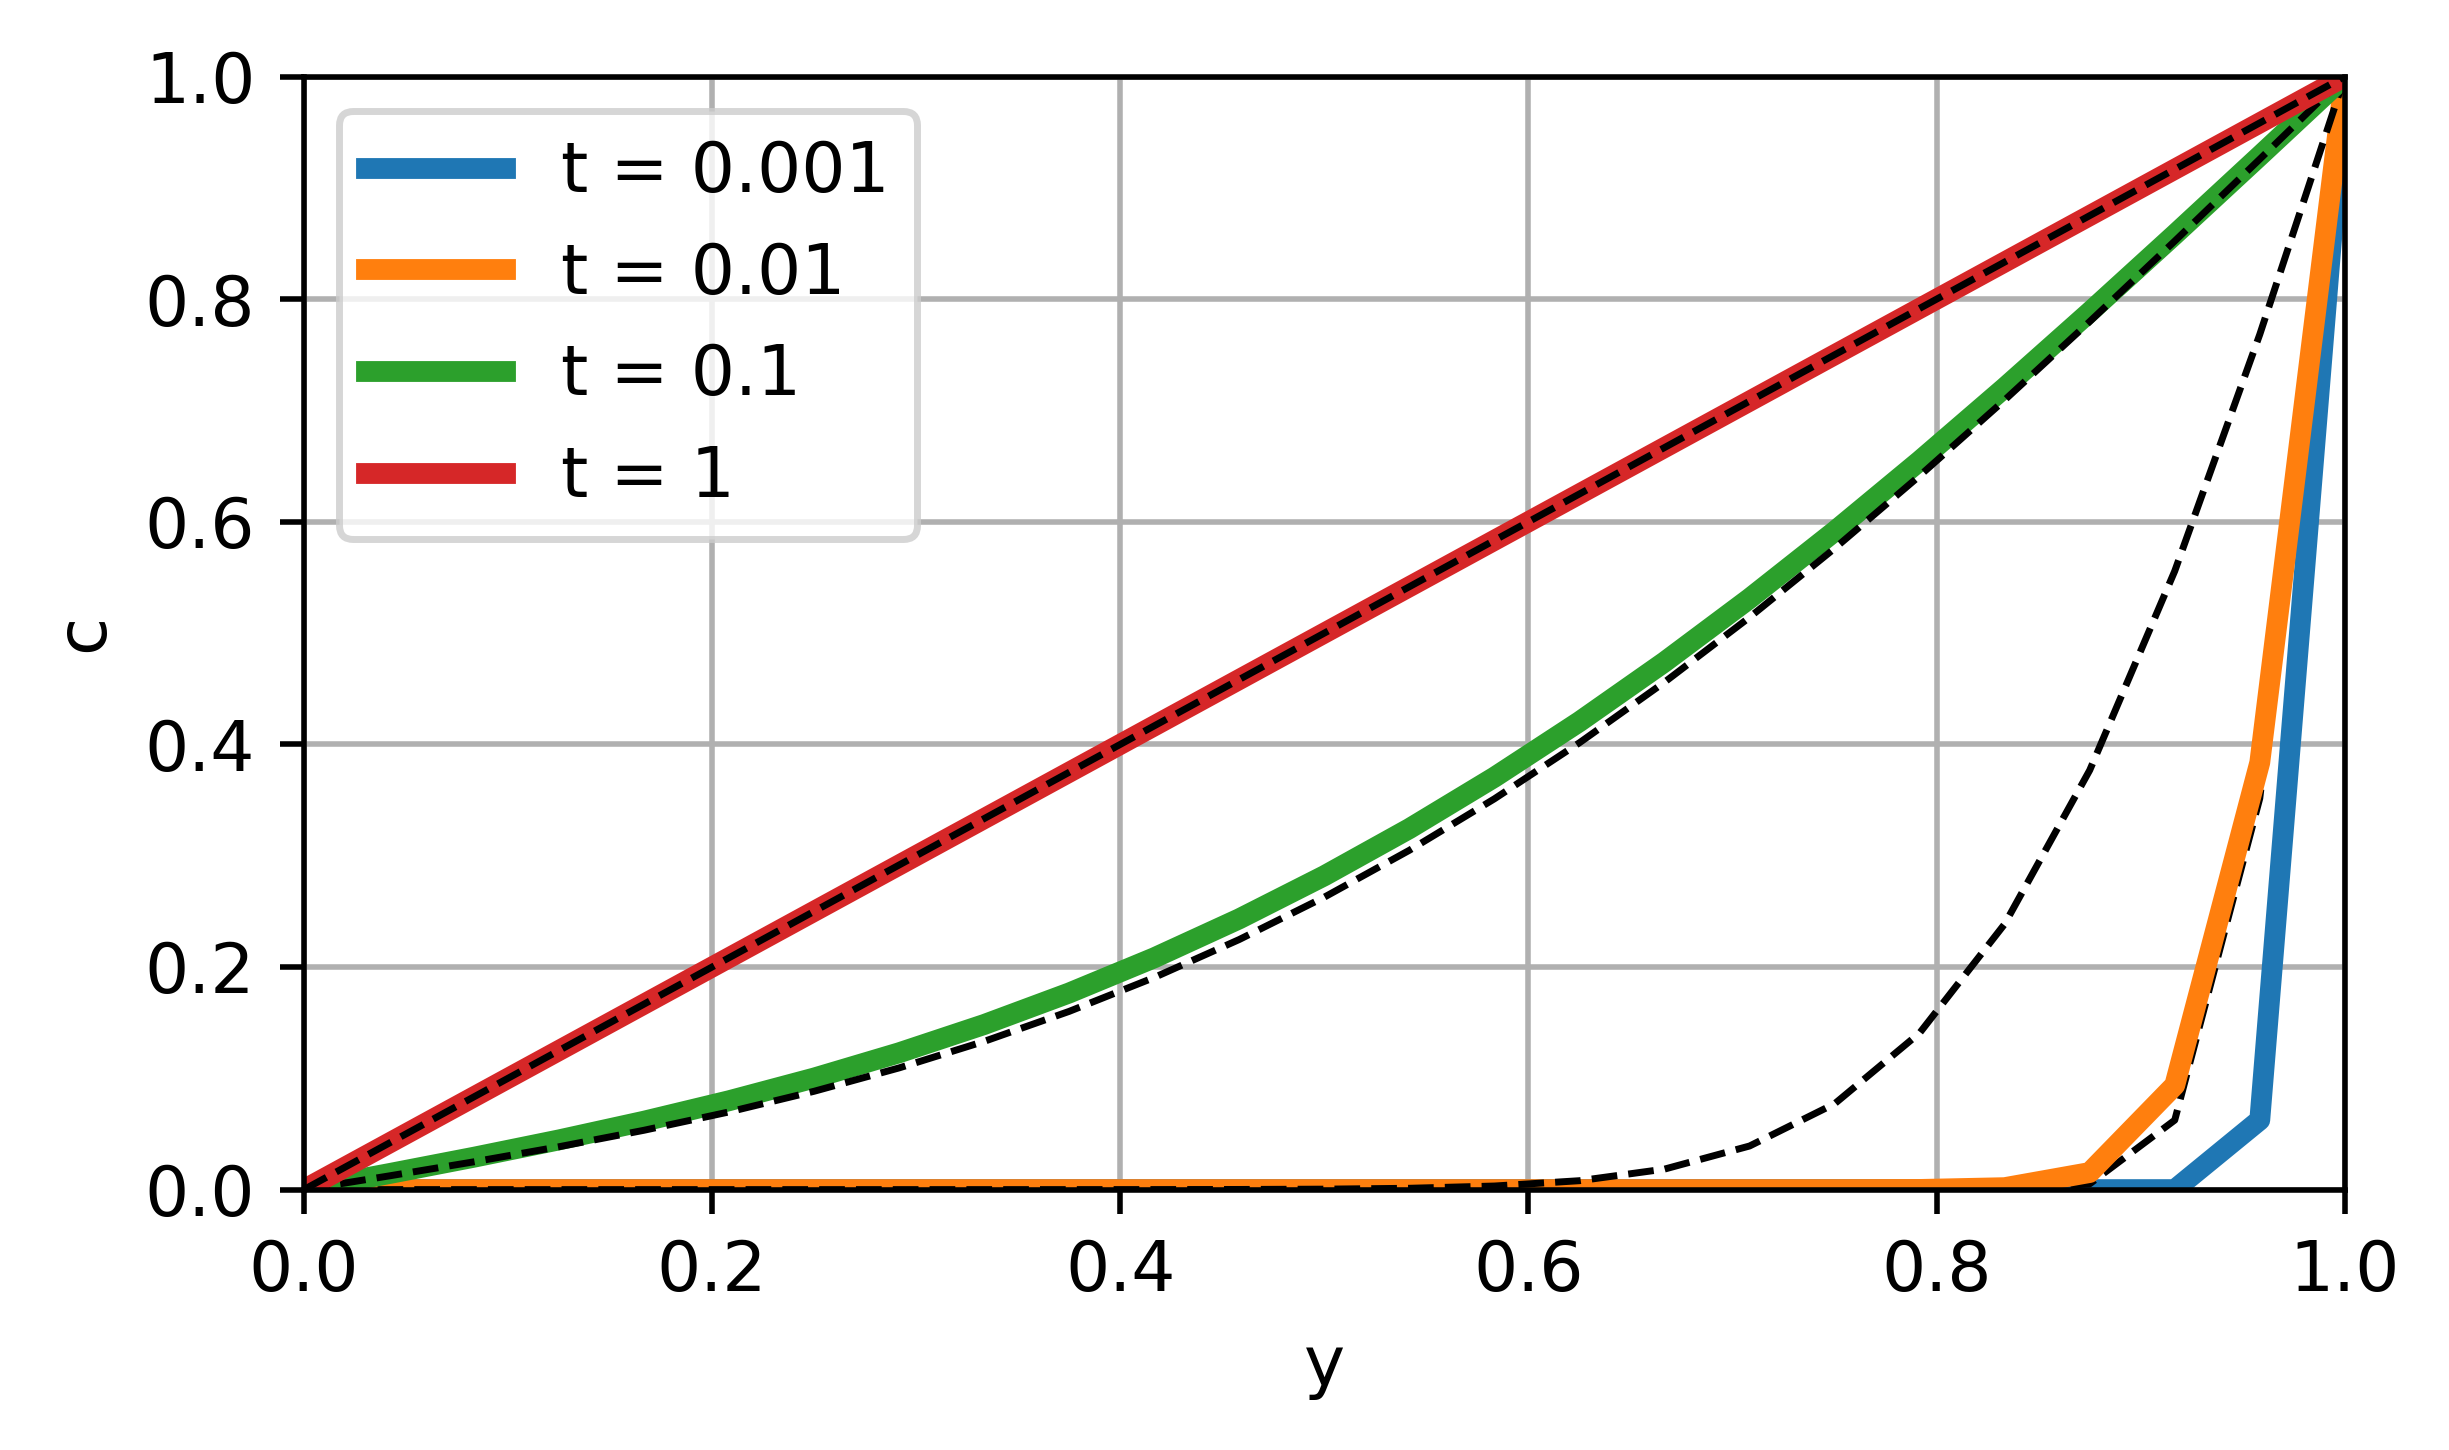

In [30]:
# Repliate Figure 2 of the assignment
plt.figure(figsize=(5,3),dpi=500)

# For all times of interest
for i in range(len(times)):
    # Simulation
    plt.plot(ys,cs_sims[i,::-1,int(N/2)],linestyle='-',label='t = '+str(times[i]),lw=3)
    
    # Analytical solution
    plt.plot(ys,cs_anals[i,:],linestyle='--',color='black',lw=1)

# Aesthetics
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y')
plt.ylabel('c')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### F. Plot the results
Show the 2D domain, with a color representing the concentration at each points

In [42]:
# Get system at desired times

for i in range(len(times)):
    time = times[i]
    sim = cs_sims[i,:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1)
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: ',str(time))
    plt.colorbar()
    

[[ 0.  0.  0. ...  0.  0.  0.]
 [nan nan nan ... nan nan nan]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [nan nan nan ... nan nan nan]
 [48. 48. 48. ... 48. 48. 48.]
 [nan nan nan ... nan nan nan]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [47. 47. 47. ... 47. 47. 47.]
 [48. 48. 48. ... 48. 48. 48.]
 [49. 49. 49. ... 49. 49. 49.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [47. 47. 47. ... 47. 47. 47.]
 [48. 48. 48. ... 48. 48. 48.]
 [49. 49. 49. ... 49. 49. 49.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [47. 47. 47. ... 47. 47. 47.]
 [48. 48. 48. ... 48. 48. 48.]
 [49. 49. 49. ... 49. 49. 49.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [47. 47. 47. ... 47. 47. 47.]
 [48. 48. 48. ... 48. 48. 48.]
 [49. 49. 49. ... 49. 49. 49.]]


C:\Users\Pablo\AppData\Local\Temp\ipykernel_13752\1395642734.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  terms = [erfc((1-y+2*i)/(2*np.sqrt(D*t)))-erfc((1+y+2*i)/(2*np.sqrt(D*t))) for i in range(points)]
C:\Users\Pablo\AppData\Local\Temp\ipykernel_13752\1395642734.py:6: RuntimeWarning: invalid value encountered in double_scalars
  terms = [erfc((1-y+2*i)/(2*np.sqrt(D*t)))-erfc((1+y+2*i)/(2*np.sqrt(D*t))) for i in range(points)]


### G. Make an animated plot until equilibrium

KeyboardInterrupt: 

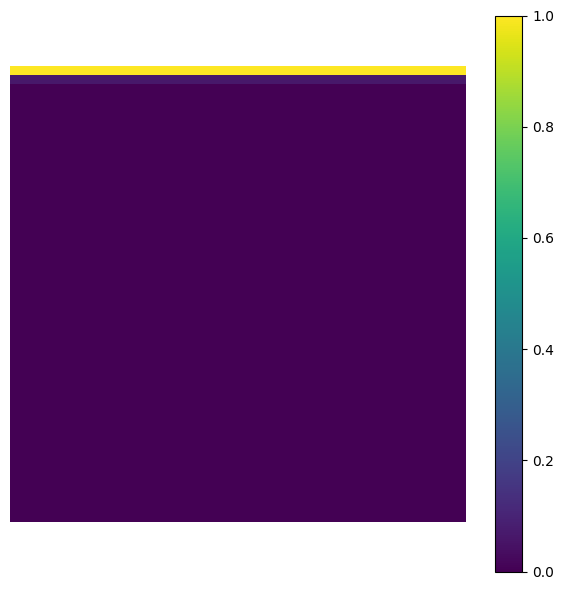

In [45]:
# Animation (saved as sim.gif, takes some time)
# Warning this code breaks the system!
plot_opinion_grid_evolution(c_sim, interval=100, name='sim.gif')

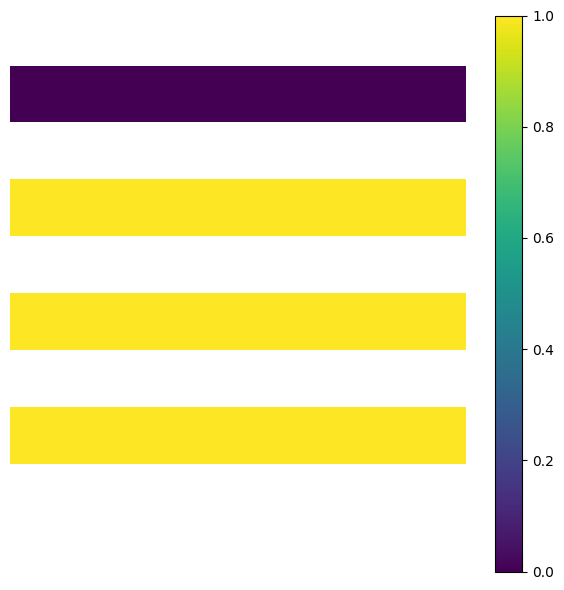

In [ ]:
# Analytical one
plot_opinion_grid_evolution(c_anal, interval=100, name='sim_analytical.gif')


## 1.3 Time Independent ...

### H. Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N= 50. Test the methods by comparing the result to the analytical result in eq.5

In [ ]:
# Functions go here

def update_jacobi(c,dx,dt,D,N):
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # Same as before
        if i==0:
            c[i,j] = 1 
        elif j==(N-1):
            c[i,j] = c[i,0]
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,c2,c3,c4 = get_neighboors(c_k,i,j)
            c[i,j] = c_k[i,j] + (1/4)*(c1+c2+c3+c4-4*c_k[i,j]) # NEW! Simplified!
    return c



def update_sor(c,dx,dt,D,N,w):
    # TODO: You need future timesteps!? and also w
    return 0

def update_gauss(c,dx,dt,D,N):
    # TODO: You need future timesteps!?
    # Just call update_sor with w=1
    return 0

In [ ]:
N = 50

# Test functions here

### I. Show how the convergence measure δ in eq. (14) depends on the number of iterations k for each of the methods

### J. Find the optimal w of SOC. How does the optimal w value depend on N?

### K. Add sinks to the domain

In [ ]:
def start_sink(N):
    # Returns a matrix of same size as grid, full of zeros
    # And with 1s in the points that are sinks
    c = np.zeros((N,N))
    
    # Left column
    c[:,0] = 0

    # Right column same as left
    #c[:,N-1] = c[:,0]

    # Top row
    c[0,:] = 1

    # Bottom row
    #c[N-1,:] = 0
    return c

In [ ]:
# Define region in 2D space
## Sink in the middle of grid, radius 


# Create 2D matrix of gridsize with 1s on the points that are within the sinks
# Update the function to return concentration 0 if the point of that matrix has 1

# Simulate normally

## Optional: Incorporate insulating material

In [ ]:
# Concentration 0 but not considered for computations
# Create 2D matrix of points that are insulating material
# Update the function to ignore points of that grid when computing concentrations!